## 보이스피싱 전체현황

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [3]:
df_raw = pd.read_csv('project_data/경찰청_보이스피싱 현황_20201231.csv', encoding='cp949')
df_raw

,구분,기관사칭형_발생건수,기관사칭형_피해액_억원,기관사칭형_검거건수,기관사칭형_검거인원,대출사기형_발생건수,대출사기형_피해액_억원,대출사기형_검거건수,대출사기형_검거인원
0,2016,3384,541,3860,5682,13656,927,7526,9884
1,2017,5685,967,3776,4925,18574,1503,15842,20548
2,2018,6221,1430,4673,5491,27911,2610,25279,32133
3,2019,7219,2506,5487,6045,30448,3892,33791,42668
4,2020,7844,2144,4297,4797,23837,4856,29754,34527


- 컬럼명 바꾸기

In [4]:
df = df_raw.rename(columns={'구분':'연도'})
df

,연도,기관사칭형_발생건수,기관사칭형_피해액_억원,기관사칭형_검거건수,기관사칭형_검거인원,대출사기형_발생건수,대출사기형_피해액_억원,대출사기형_검거건수,대출사기형_검거인원
0,2016,3384,541,3860,5682,13656,927,7526,9884
1,2017,5685,967,3776,4925,18574,1503,15842,20548
2,2018,6221,1430,4673,5491,27911,2610,25279,32133
3,2019,7219,2506,5487,6045,30448,3892,33791,42668
4,2020,7844,2144,4297,4797,23837,4856,29754,34527


In [5]:
df.describe()

,연도,기관사칭형_발생건수,기관사칭형_피해액_억원,기관사칭형_검거건수,기관사칭형_검거인원,대출사기형_발생건수,대출사기형_피해액_억원,대출사기형_검거건수,대출사기형_검거인원
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,2018.000000,6070.600000,1517.600000,4418.600000,5388.00000,22885.200000,2757.600000,22438.400000,27952.000000
std,1.581139,1721.401842,811.463678,697.487132,522.57631,6839.684035,1630.724471,10681.300309,12831.054925
min,2016.000000,3384.000000,541.000000,3776.000000,4797.00000,13656.000000,927.000000,7526.000000,9884.000000
25%,2017.000000,5685.000000,967.000000,3860.000000,4925.00000,18574.000000,1503.000000,15842.000000,20548.000000
50%,2018.000000,6221.000000,1430.000000,4297.000000,5491.00000,23837.000000,2610.000000,25279.000000,32133.000000
75%,2019.000000,7219.000000,2144.000000,4673.000000,5682.00000,27911.000000,3892.000000,29754.000000,34527.000000
max,2020.000000,7844.000000,2506.000000,5487.000000,6045.00000,30448.000000,4856.000000,33791.000000,42668.000000


- 연도별 발생건수 비교(기관사칭, 대출사기)

In [6]:
df[['기관사칭형_발생건수','대출사기형_발생건수']]

,기관사칭형_발생건수,대출사기형_발생건수
0,3384,13656
1,5685,18574
2,6221,27911
3,7219,30448
4,7844,23837


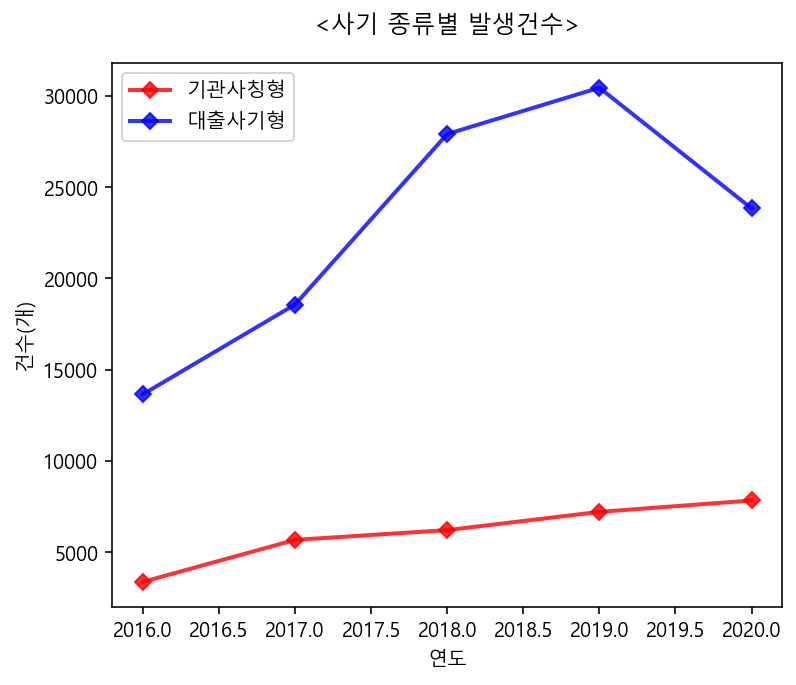

In [7]:
plt.figure(figsize=(6,5))
plt.plot(df['연도'],df['기관사칭형_발생건수'], color='red', 
         marker='D', alpha=0.8, linewidth=2,label = '기관사칭형')
plt.plot(df['연도'], df['대출사기형_발생건수'], color='blue', 
         marker='D', alpha=0.8, linewidth=2,label = '대출사기형')

plt.legend()
plt.title('<사기 종류별 발생건수>',pad=15)
plt.xlabel('연도')
plt.ylabel('건수(개)')
plt.show()

In [8]:
#대출사기형 보이스피싱이 기관사칭형 보이스피싱의 발생건수보다 3배 이상 많다는 것을 알 수 있습니다.

- 연도별 피해액 비교(기관사칭, 대출사기)

In [9]:
df[['기관사칭형_피해액_억원','대출사기형_피해액_억원']]

,기관사칭형_피해액_억원,대출사기형_피해액_억원
0,541,927
1,967,1503
2,1430,2610
3,2506,3892
4,2144,4856


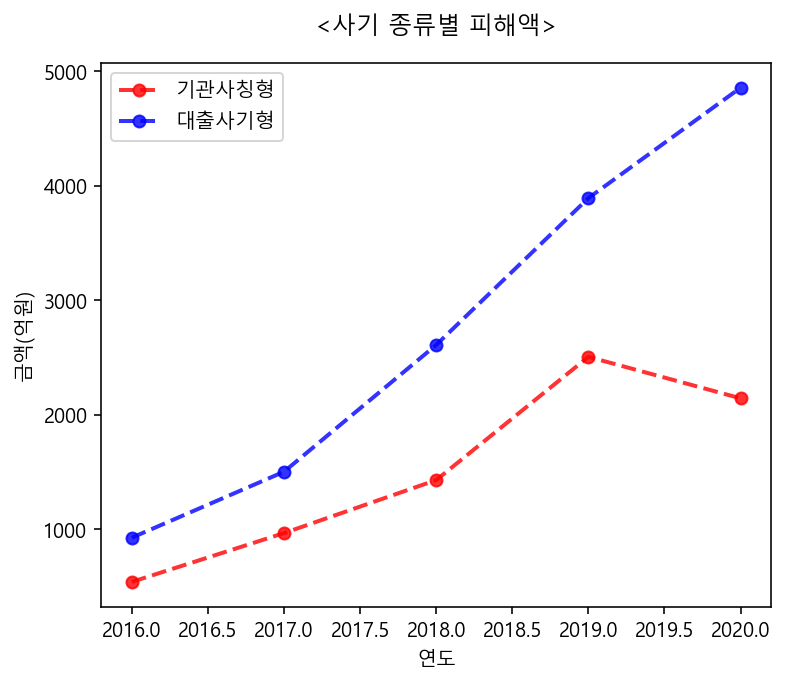

In [10]:
plt.figure(figsize=(6,5))
plt.plot(df['연도'],df['기관사칭형_피해액_억원'], color='red', 
         marker='o', alpha=0.8, linewidth=2,label = '기관사칭형', linestyle='--')
plt.plot(df['연도'], df['대출사기형_피해액_억원'], color='blue', 
         marker='o', alpha=0.8, linewidth=2,label = '대출사기형', linestyle='--')

plt.legend()
plt.title('<사기 종류별 피해액>',pad=15)
plt.xlabel('연도')
plt.ylabel('금액(억원)')
plt.show()

In [11]:
# 발생건수와 마찬가지로 피해액도 대출사기형 보이스피싱이 많다는 것을 알 수 있습니다.
# 그리고 전체적으로 피해액의 크기가 대체적으로 증가하고 있다는 것을 확인할 수 있습니다.

- 연도별 검거건수 비교(기관사칭, 대출사기)

In [12]:
df[['기관사칭형_검거건수','대출사기형_검거건수']]

,기관사칭형_검거건수,대출사기형_검거건수
0,3860,7526
1,3776,15842
2,4673,25279
3,5487,33791
4,4297,29754


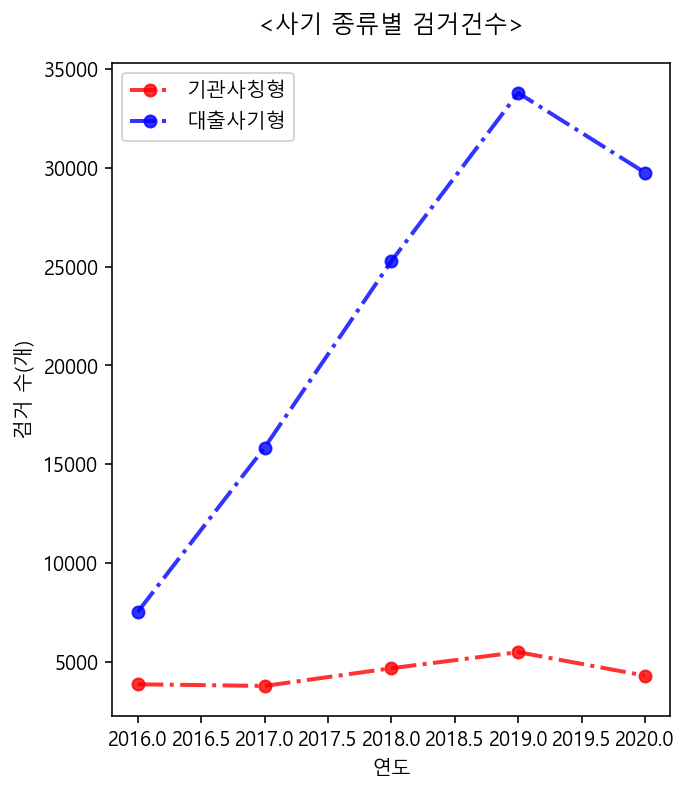

In [13]:
plt.figure(figsize=(5,6))
plt.plot(df['연도'],df['기관사칭형_검거건수'], color='red', 
         marker='o', alpha=0.8, linewidth=2,label = '기관사칭형', linestyle='-.')
plt.plot(df['연도'], df['대출사기형_검거건수'], color='blue', 
         marker='o', alpha=0.8, linewidth=2,label = '대출사기형', linestyle='-.')

plt.legend()
plt.title('<사기 종류별 검거건수>',pad=15)
plt.xlabel('연도')
plt.ylabel('검거 수(개)')
plt.show()

In [14]:
# 위의 그래프들과 마찬가지로 대출사기형 검거 수가 많다는 것을 알 수 있습니다.
# 첫 번째 발생건수 그래프 =>  대출사기의 발생건수가 2020년에 줄어들어 이에따라 검거건수도 
# 감소했음을 예상할 수 있음

In [15]:
# sns.set(font_scale=1.2, font="Malgun Gothic")
# sns.barplot(data = df_raw, x='연도', y='기관사칭형_발생건수')

- 발생건수에 대한 검거건수의 비율(%)

In [48]:
ratio = pd.DataFrame({'연도':['2016년','2017년','2018년','2019년','2020년'],
                            '비율':[1.14,0.66,0.75,0.76,0.54]})
ratio

,연도,비율
0,2016년,1.14
1,2017년,0.66
2,2018년,0.75
3,2019년,0.76
4,2020년,0.54


Text(0.5, 1.0, '발생건수에 대한 검거건수의 비율')

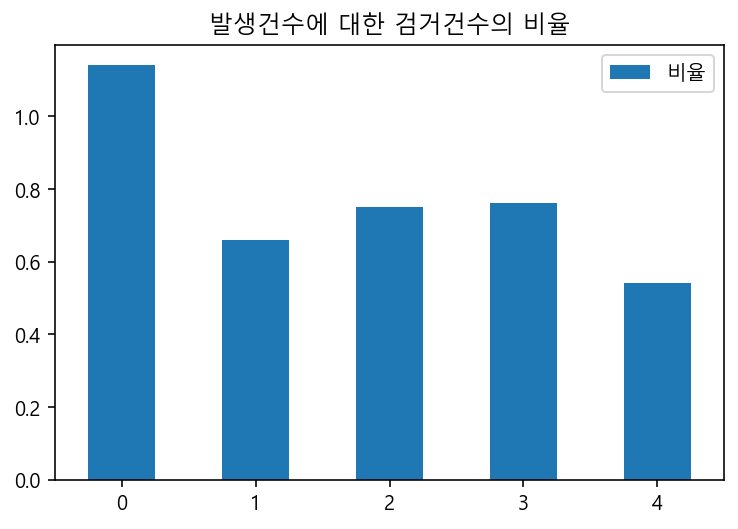

In [56]:
ratio.plot.bar(rot=360)
plt.title('발생건수에 대한 검거건수의 비율')

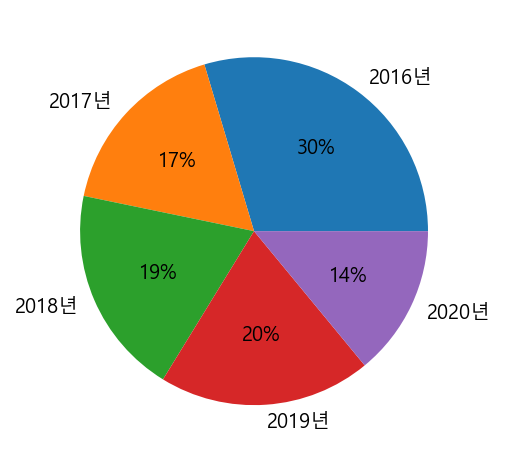

In [65]:
plt.pie(ratio['비율'], labels=ratio['연도'],autopct='%.f%%')
plt.show()